In [4]:
import tensorflow as tf
from matplotlib import pyplot as plt
from keras import layers, losses, optimizers, models, metrics
import numpy as np
import pandas as pd
from collections import Counter

from sentence_transformers import SentenceTransformer, util


In [2]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [12]:

#Remove line 165 (South Delhi) line as it is a singleton from content_log.txt
with open("session_log.txt","r") as fh:
    data = fh.readlines()
    output = list(map(lambda x: x.strip()[11:], filter(lambda x: True if x.strip().startswith('\"content') else False, data)))
    if len(output) < 0:
        raise Exception("No rows extracted")
    # with open("content_log.txt","w") as wfh:
    #     list(map(lambda x: wfh.write(x+"\n"), output))
        

In [14]:
def compare_output(rag,non_rag):
    ln_rag = len(rag)
    ln_non_rag = len(non_rag)
    len_diff = abs(ln_rag-ln_non_rag)

    count = 0
    for idx, l in enumerate(rag):
        if idx >= len(non_rag):
            break
        
        if l == non_rag[idx]:
            count +=1 

    return len_diff, count, round(count*100/ln_rag,2), round(count*100/ln_non_rag,2)

def term_frequency(line):
    line = line.replace("\"","").replace(",","")
    words = line.split(" ")

    c = Counter(words)
    for i in c:
    
        c[i]=c[i]/len(words)
    
    return c

def similarity(line1, line2):
    e1 = model.encode(line1)
    e2 = model.encode(line2)

    return util.dot_score(e1,e2).item()


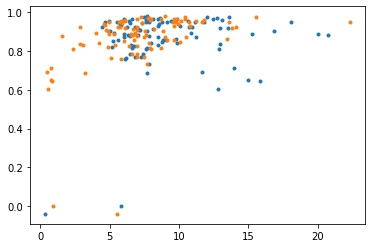

In [17]:
simi = []
perx = []
pery = []

with open("content_log.txt", "r") as fh:
    lines = fh.readlines()
    for i in range(0,len(lines), 2):
        simi.append(similarity(lines[i],lines[i+1]))
        a,b,x,y = compare_output(lines[i], lines[i+1])
        perx.append(x)
        pery.append(y)

plt.plot(perx, simi,'.')
plt.plot(pery, simi,'.')
plt.show()